### <h3 style="background-color:#6c757d;color:Red;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Innomatics Internship Task </centre></strong></h3>

### <h3 style="background-color:#6c757d;color:Black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><righte>KNN from Scratch </righte></strong></h3>

### Decription of The Dataset

- Carat :  Carat weight of the Diamond.
- Cut :  Describe cut quality of the diamond.
- Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
- Color : Color of the Diamond.
- With D being the best and J the worst.
- Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
- (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
- Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
- Price : The Price of the Diamond.
- X : Length of the Diamond in mm.
- Y : Width of the Diamond in mm.
- Z : Height of the Diamond in mm.

Price is the Target Variable.

### <h3 style="background-color:#6c757d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages </centre></strong></h3>

In [ ]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 



# Modelling Algorithms :

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor


# Modelling :
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.impute import SimpleImputer




# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler,  LabelEncoder
from sklearn.impute import SimpleImputer


# Evaluation Metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno
%matplotlib inline

### <h3 style="background-color:#6c757d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset </centre></strong></h3>

In [ ]:
# Importing the data

data = pd.read_csv('diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Shape of the dataset

data.shape

(53940, 10)

In [ ]:
# Statistcal information of the dataset

data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Observation : We can see min values of X,Y & Z. 

#### It doesn't make any sense to have either of Length or Width or Height to be zero.

In [ ]:
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
len(data[(data['x']==0) | (data['y']==0) | (data['z']==0)])

20

#### Observation : We can see there are 20 rows with Dimesions 'Zero'

#### Instead of filling them with Mean or Median better to drop them

In [ ]:
# Dropping Rows with Dimensions 'Zero'

data = data[(data[['x','y','z']] != 0).all(axis=1)]

In [ ]:
# Just to Confirm

data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [ ]:
# Summary of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
# Checking for null values

data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:>

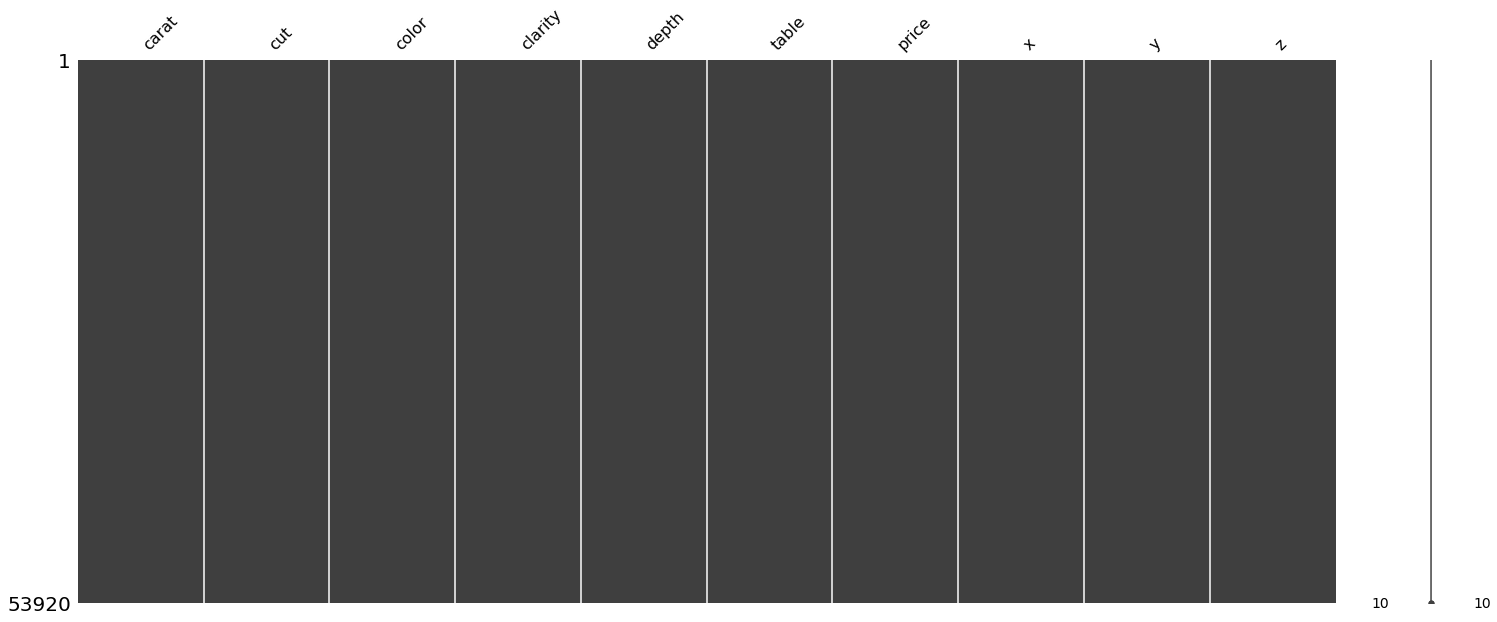

In [ ]:
# Visualizing the missing values 

msno.matrix(data)

Cool, No Null Values. Let's check for duplicate entries

In [ ]:
data.duplicated().sum()

145

In [ ]:
# Oh! There were some need to drop them

data.drop_duplicates(inplace=True)

In [ ]:
# Checking for confirmation

data.duplicated().sum()

0

In [ ]:
# Viewing the columns

data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
# Numerical Columns

numerical_data = data.select_dtypes(['int64','float64'])

numerical_cols = numerical_data.columns

print('Numerical Columns : {}'.format(list(numerical_cols)))

Numerical Columns : ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [ ]:
# Categorical Columns

categorical_data = data.select_dtypes(['object'])

categorical_cols = categorical_data.columns

print('Categorical Columns : {}'.format(list(categorical_cols)))

Categorical Columns : ['cut', 'color', 'clarity']


In [ ]:
# Checking for Unique values in each column

print ("Unique values are:\n",data.nunique())

Unique values are:
 carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11597
x            553
y            550
z            374
dtype: int64


### <h3 style="background-color:#6c757d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Exploratory Data Analysis </centre></strong></h3>

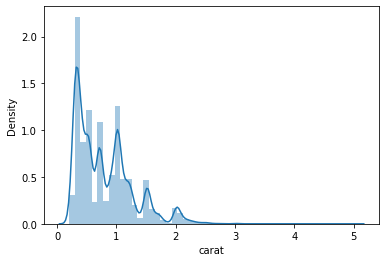

In [ ]:
# Carat Variable

sns.distplot(data.carat);

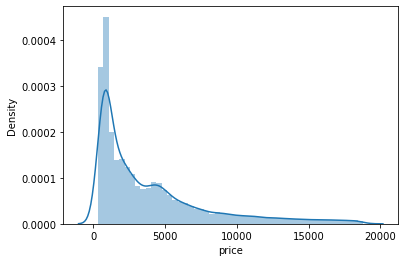

In [ ]:
# Price Variable

sns.distplot(data.price);

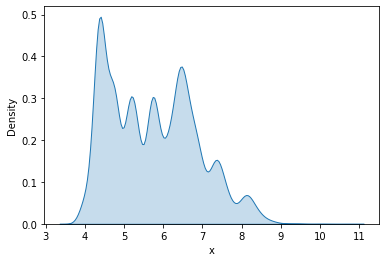

In [ ]:
# x Variable

sns.kdeplot(data.x, shade=True);

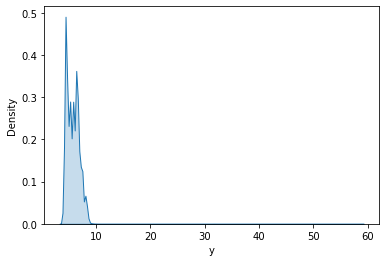

In [ ]:
sns.kdeplot(data.y, shade=True);

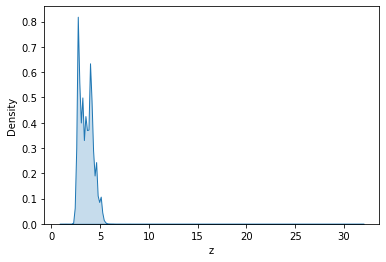

In [ ]:
# Z Variable

sns.kdeplot(data.z, shade=True);

In [ ]:
# Cut Variable 

data.cut.value_counts()

Ideal        21485
Premium      13737
Very Good    12068
Good          4888
Fair          1597
Name: cut, dtype: int64

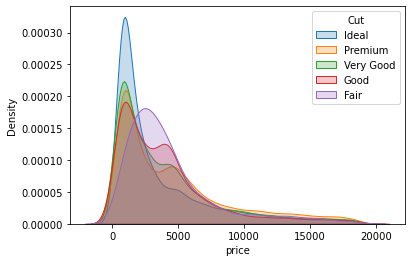

In [ ]:
sns.kdeplot(data[data.cut == 'Ideal'].price, shade= True);
sns.kdeplot(data[data.cut == 'Premium'].price, shade=True);
sns.kdeplot(data[data.cut == 'Very Good'].price, shade= True);
sns.kdeplot(data[data.cut == 'Good'].price, shade= True);
sns.kdeplot(data[data.cut == 'Fair'].price, shade= True);
plt.legend(title="Cut", labels= ['Ideal','Premium','Very Good','Good','Fair']);

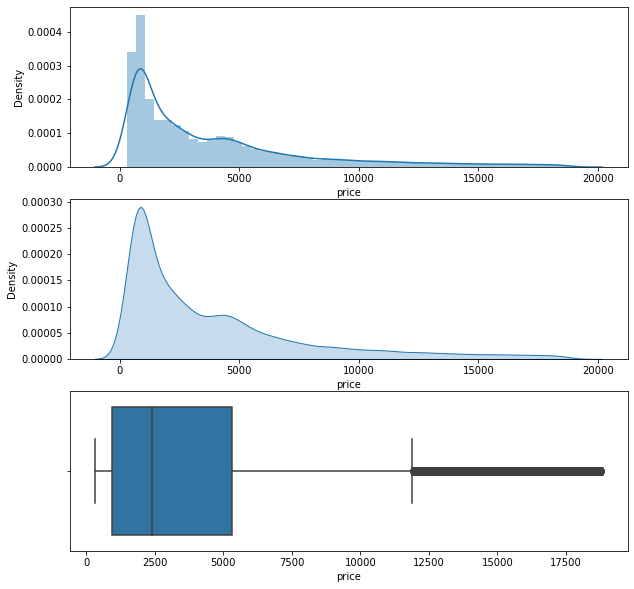

In [ ]:
# Price Variable - Combination of two plots

fig, axs = plt.subplots(nrows= 3)
p1= fig.set_size_inches(10,10)
p2= sns.distplot(data.price, ax= axs[0]);
p3= sns.kdeplot(data.price, shade=True, ax= axs[1]);
sns.boxplot(x = 'price', data= data, ax= axs[2]);

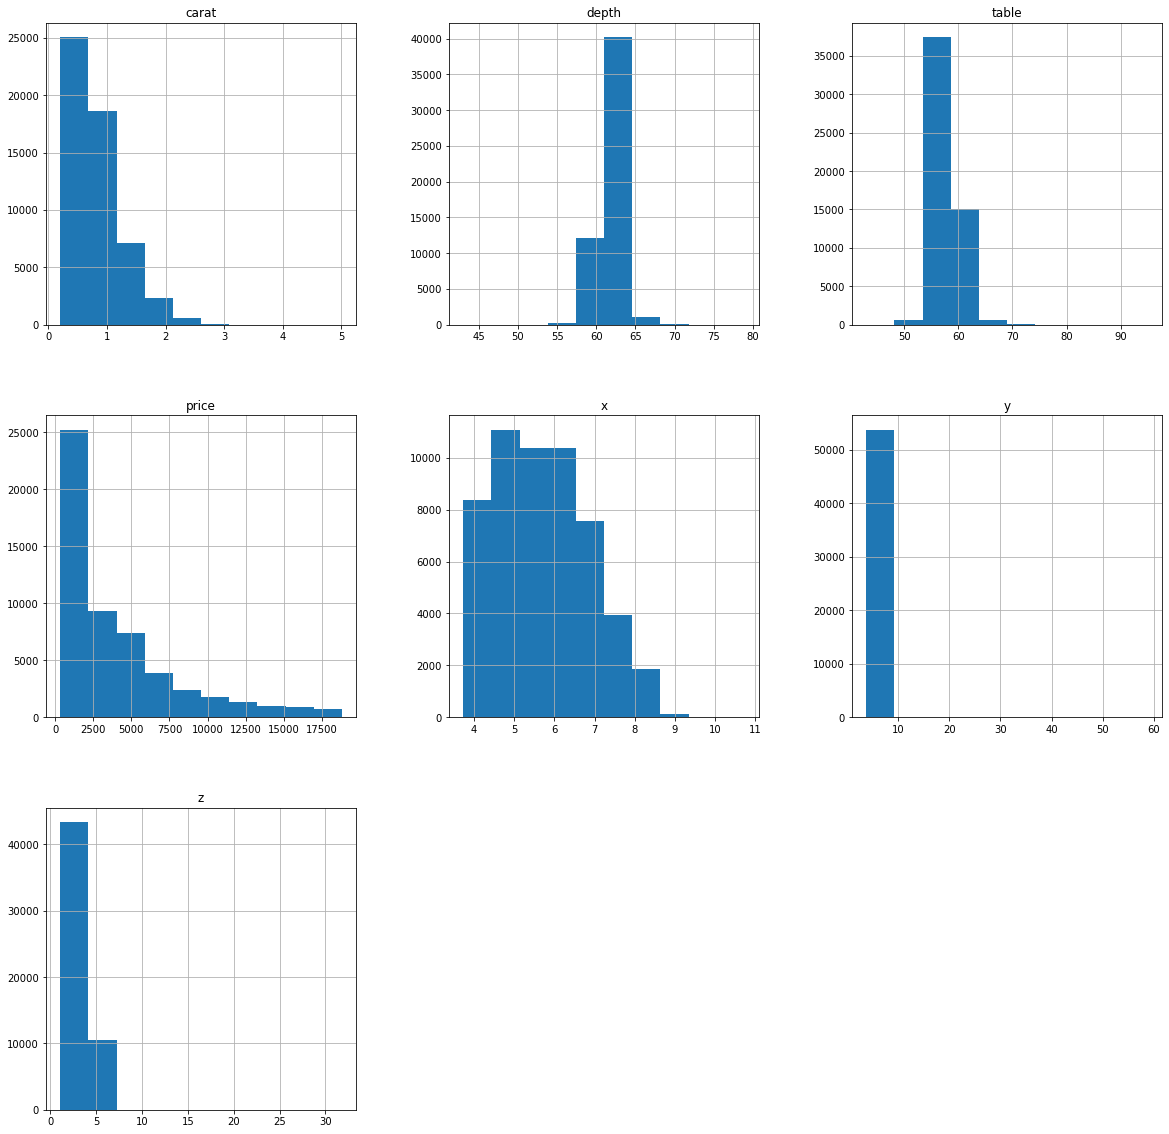

In [ ]:
# Histogram

data.hist(figsize= (20,20))
plt.show()

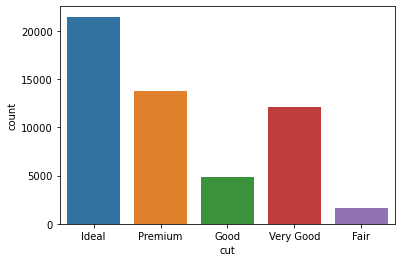

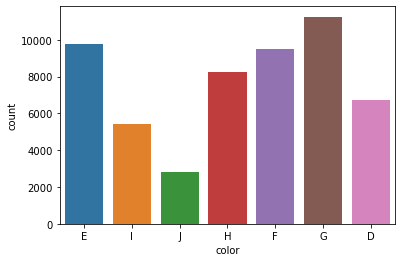

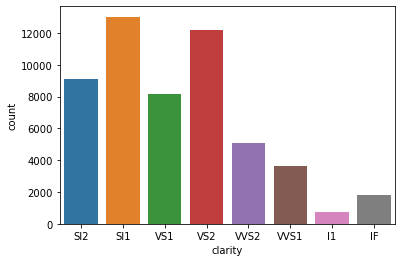

In [ ]:
# Distibution of Categorical Variables

for feature in data.dtypes[data.dtypes == 'object'].index:
    sns.countplot(x= feature, data= categorical_data)
    plt.show()

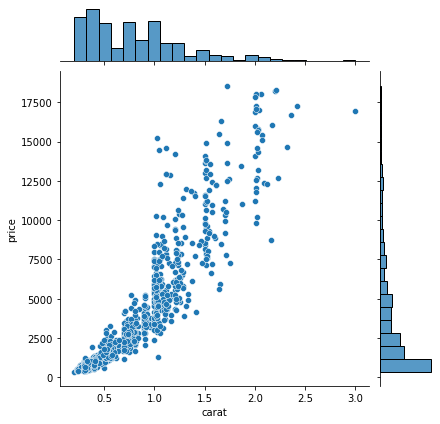

In [ ]:
# Carat Vs Price 

sns.jointplot('carat', 'price', data= data.sample(1000));

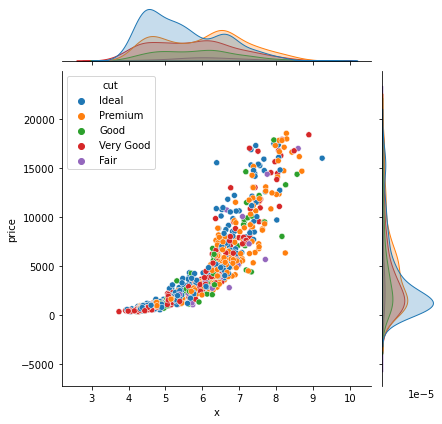

In [ ]:
# x Vs Price

sns.jointplot('x', 'price', data= data.sample(1000), hue='cut');

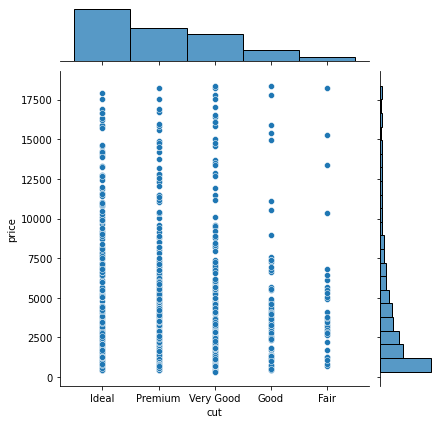

In [ ]:
# Cut Vs Price

sns.jointplot('cut', 'price', data= data.sample(1000));

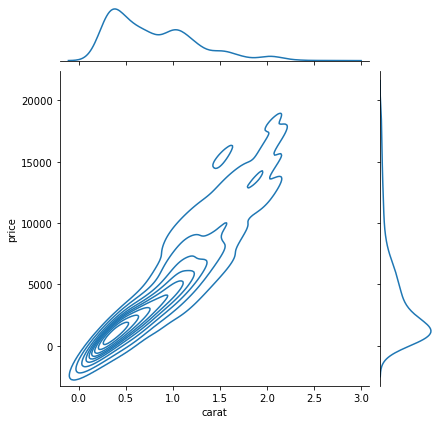

In [ ]:
# Carat Vs Price

sns.jointplot('carat', 'price',kind='kde', data= data.sample(1000));

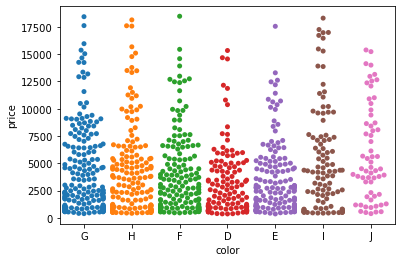

In [ ]:
# Color Vs Price - Swarm Plot

sns.swarmplot(x = 'color', y= 'price', data= data.sample(1000));

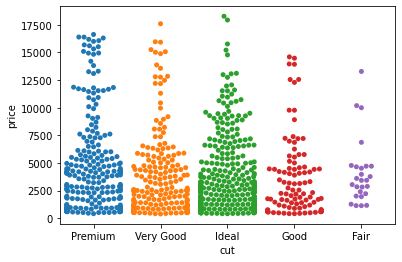

In [ ]:
# Cut Vs Price

sns.swarmplot(x = 'cut', y= 'price', data= data.sample(1000));

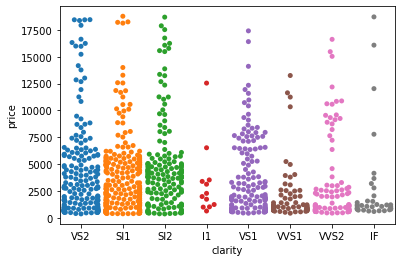

In [ ]:
# Clarity Vs Price

sns.swarmplot(x= 'clarity', y= 'price', data= data.sample(1000));

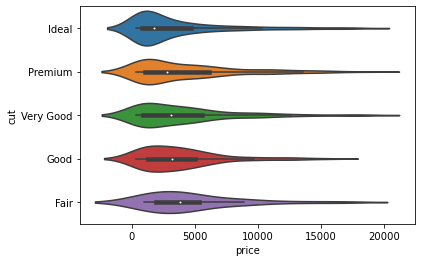

In [ ]:
# Price Vs Cut - Violin Plot

sns.violinplot(x= "price", y="cut", data= data.sample(1000));

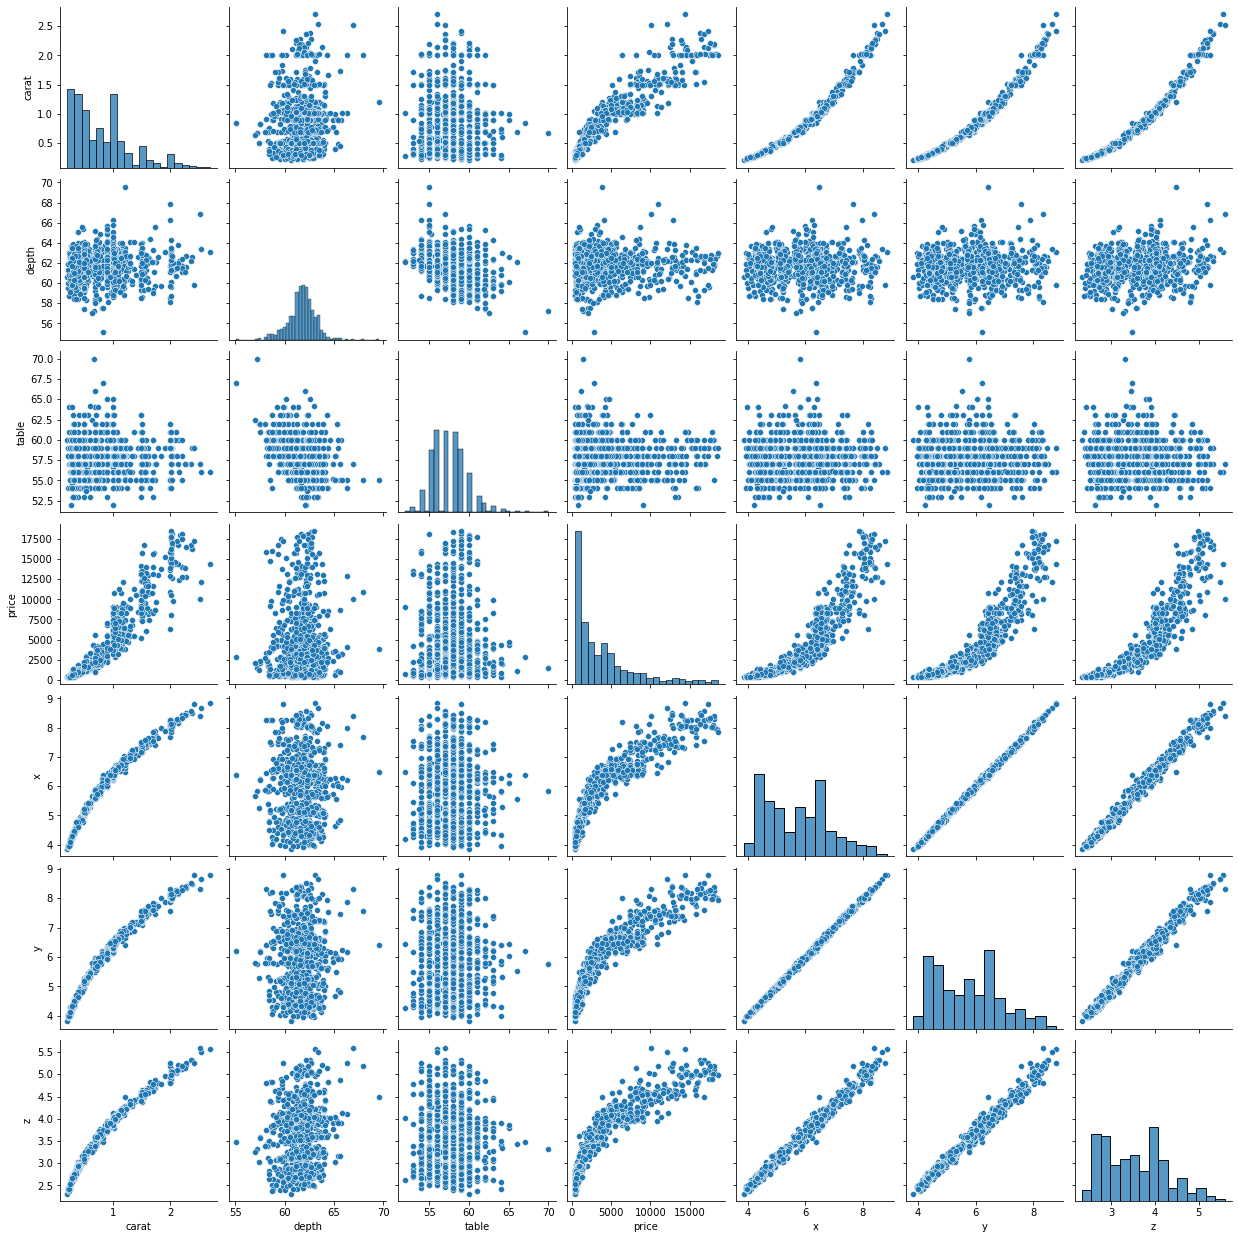

In [ ]:
# Pair Plot 

sns.pairplot(data.sample(1000));

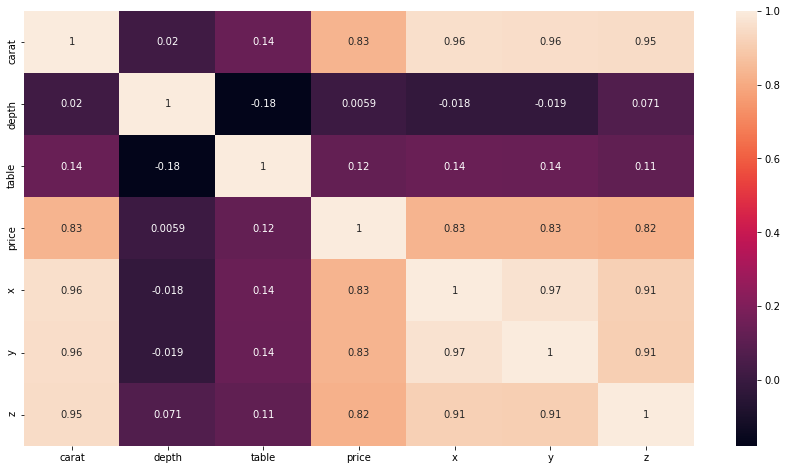

In [ ]:
# Heatmap

corr = data.corr(method = 'kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot= True)
plt.show()

## Observations:

**1. Depth is inversely related to Price.**

**2. The Price of the Diamond is highly correlated to Carat, and its Dimensions.**

**3. The Weight (Carat) of a diamond has the most significant impact on its Price.**

**4. The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.**

**5. Self Relation ie. of a feature to itself is 1 as expected.**

**6. Some other Inferences can also be drawn.**

### <h3 style="background-color:#6c757d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre> Feature Engineering</centre></strong></h3>

In [ ]:
# Volume

data['volume'] = data['x']*data['y']*data['z']
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [ ]:
# Drop X,Y,Z

data.drop(['x','y','z'], axis=1, inplace=True)

data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


### Encoding the Categorical Variables

We apply One-Hot Encoding when:

The categorical feature is not `ordinal`
The number of categorical features is less so one-hot encoding can be effectively applied.

We apply Label Encoding when:

The categorical feature is `ordinal`
 The number of categories is quite large as one-hot encoding can lead to high memory consumption.

In [ ]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


data['cut'] = label_cut.fit_transform(data['cut'])
data['color'] = label_color.fit_transform(data['color'])
data['clarity'] = label_clarity.fit_transform(data['clarity'])

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


In [ ]:
# Feature Scaling

# Split the data into train and test

X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [ ]:
# Standard Scaler 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Without Using Scikit-Learn

In [ ]:
class KNN:
    def __init__(self,k):
        self.k=k
    def fit(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
    def predict(self,X):
        X=np.asarray(X)
        result=[]
        for x in X:
            dis=np.sqrt(np.sum((x-self.X)**2,axis=1))
            index=dis.argsort()
            index=index[:self.k]
            result.append(np.mean(self.y[index]))
        return np.array(result)

In [ ]:
knn=KNN(k=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
display(y_pred)

array([1469.66666667,  770.66666667,  925.        , ..., 5446.66666667,
        780.33333333, 1961.66666667])

In [ ]:
from sklearn import metrics
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error:  828.9294164485901


In [ ]:
print(metrics.r2_score(y_test, y_pred))

0.9574053563009125


### Using Scikit-Learn

In [ ]:
# KNeighbours Regression:

clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished



###### KNeighbours Regression ######
Score : 0.9587
[0.95178624 0.95083439 0.95608364 0.95466409 0.95256684]

MSE    : 665722.00 
MAE    : 438.47 
RMSE   : 815.92 
R2     : 0.96 


In [ ]:
# Tuning Parameters

n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)

Score : 0.9567
R2     : 0.96 


### End of Assignment